In [100]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib notebook

In [159]:
df = pd.read_table('GitHub/PaymentDecisions/to_python.txt', header = 0, sep = '\t')
print('-----LOADING DONE-----')

-----LOADING DONE-----


In [160]:
####just for march check##############
#check = df.copy()
#check = check[check['nextinvoicedate']>= '2019-01-01']
#df =  df[df['nextinvoicedate']< '2019-01-01']
#df.drop('nextinvoicedate', inplace= True, axis=1)
##############
df['productgroup'] = df['productgroup'].apply(lambda x: x.strip())
df['city_f'] = df['city_f'].apply(lambda x: x.strip())
df['isDTH'] = df['productgroup'].apply(lambda x: 1 if x in ['Access','Family','Compact','Compact +','Premium'] else 0)
df.drop('city_f', inplace = True,axis = 1)
df.drop('productgroup', inplace = True, axis=1)
df = pd.get_dummies(df)
df.fillna(df.mean(), inplace=True)
dependent_variable = df['inactive_on_duedate']
df.drop('inactive_on_duedate', inplace = True,axis = 1)
df['inactive_on_duedate'] = dependent_variable
#df = df.sample(20000)
y = df.iloc[:,-1]
X = df.iloc[:,:-1]


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
print('----SPLIT READY-------')

----SPLIT READY-------


In [156]:
gbc = GradientBoostingClassifier(random_state=0)
grid_values_gbc = {'n_estimators':[150,200,300,400],'learning_rate':[0.01, 0.1, 0.2, 0.3, 0.4]}
grid_gbc_auc = GridSearchCV(gbc, param_grid = grid_values_gbc, cv = 3,  scoring='roc_auc')
grid_gbc_auc.fit(X_train, y_train, sample_weights)
print('Grid best parameter (max. roc_auc): ', grid_gbc_auc.best_params_)
print('Grid best score (roc_auc): ', grid_gbc_auc.best_score_)

('Grid best parameter (max. roc_auc): ', {'n_estimators': 200, 'learning_rate': 0.1})
('Grid best score (roc_auc): ', 0.7653811173796935)


In [157]:
rfc = RandomForestClassifier(random_state=0, n_jobs=-1, verbose=1)
grid_values_rfc = {'n_estimators':[200,400,600,1000],'max_features':['auto', 'sqrt', 'log2']}
grid_rfc_auc = GridSearchCV(rfc, param_grid = grid_values_rfc, cv = 3,  scoring='roc_auc')
grid_rfc_auc.fit(X_train, y_train, sample_weights)
print('Grid best parameter (max. roc_auc): ', grid_rfc_auc.best_params_)
print('Grid best score (roc_auc): ', grid_rfc_auc.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]

('Grid best parameter (max. roc_auc): ', {'max_features': 'auto', 'n_estimators': 1000})
('Grid best score (roc_auc): ', 0.7551301394313902)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.4s finished


In [158]:
lr = LogisticRegression(random_state=0, n_jobs=-1, verbose=1)
grid_values_lr = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
grid_lr_auc = GridSearchCV(lr, param_grid = grid_values_lr, cv = 3,  scoring='roc_auc')
grid_lr_auc.fit(X_train, y_train, sample_weights)
print('Grid best parameter (max. roc_auc): ', grid_lr_auc.best_params_)
print('Grid best score (roc_auc): ', grid_lr_auc.best_score_)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]('Grid best parameter (max. roc_auc): ', {'penalty': 'l1', 'C': 0.1})
('Grid best score (roc_auc): ', 0.7051050410334434)


In [162]:
clf = GradientBoostingClassifier(random_state=0, n_estimators=200, learning_rate = 0.1).fit(X_train, y_train,sample_weights)
y_predict = clf.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_predict))
print('Precision Score: ', precision_score(y_test,y_predict))
print('Recall Score: ', recall_score(y_test,y_predict))
print ('Confusion Matrix', confusion_matrix(y_test, y_predict))
feature_importances_clf = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_clf)



('Accuracy Score: ', 0.7202208088323533)
('Precision Score: ', 0.7557215600693862)
('Recall Score: ', 0.7552250073394752)
('Confusion Matrix', array([[36002, 17462],
       [17509, 54022]], dtype=int64))
                               importance
active_days_last_3months         0.450131
active_days_last_6months         0.266721
day_month                        0.143272
week_day                         0.081693
days_since_product_activation    0.033114
isDTH                            0.018063
days_tenure                      0.007005


<IPython.core.display.Javascript object>


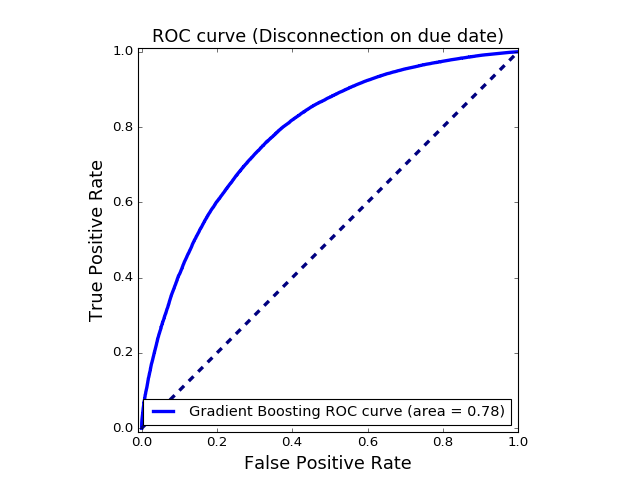

In [164]:
###just for march check
#check.drop('nextinvoicedate', inplace= True, axis=1)
#check['city_f'] = check['city_f'].apply(lambda x: x.strip())
#check = pd.get_dummies(check)
#check.fillna(check.mean(), inplace=True)
#dependent_variable = check['inactive_on_duedate']
#check.drop('inactive_on_duedate', inplace = True,axis = 1)
#check['inactive_on_duedate'] = dependent_variable
#y = check.iloc[:,-1]
#X = check.iloc[:,:-1]
#y_predict_clf = clf.predict_proba(X)[:,1]
#fpr_lr_clf, tpr_lr_clf, _ = roc_curve(y, y_predict_clf)
#roc_auc_lr_clf = auc(fpr_lr_clf, tpr_lr_clf)
#plt.figure()
#plt.xlim([-0.01, 1.00])
#plt.ylim([-0.01, 1.01])
#plt.plot(fpr_lr_clf, tpr_lr_clf, lw=3, label='Gradient Boosting ROC curve (area = {:0.2f})'.format(roc_auc_lr_clf))
#plt.xlabel('False Positive Rate', fontsize=16)
#plt.ylabel('True Positive Rate', fontsize=16)
#plt.title('ROC curve (Disconnection on due date - prediction for March due dates.)', fontsize=16)
#plt.legend(loc='lower right', fontsize=13)
#plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
#plt.axes().set_aspect('equal')
#plt.show()


###########

y_predict_clf = clf.predict_proba(X_test)[:,1]
fpr_lr_clf, tpr_lr_clf, _ = roc_curve(y_test, y_predict_clf)
roc_auc_lr_clf = auc(fpr_lr_clf, tpr_lr_clf)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr_clf, tpr_lr_clf, lw=3, label='Gradient Boosting ROC curve (area = {:0.2f})'.format(roc_auc_lr_clf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Disconnection on due date)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [165]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators = 1000, verbose=1, max_features = 'auto').fit(X_train, y_train,sample_weights)
y_predict = rf.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_predict))
print('Precision Score: ', precision_score(y_test,y_predict))
print('Recall Score: ', recall_score(y_test,y_predict))
print('AUC Score: ', roc_auc_score(y_test, y_predict))

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    6.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   11.8s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   14.9s finished


('Accuracy Score: ', 0.7122044881795272)
('Precision Score: ', 0.7242897512236969)
('Recall Score: ', 0.8026310271071284)
('AUC Score: ', 0.6969256437346207)
                               importance
days_tenure                      0.286652
active_days_last_6months         0.199962
days_since_product_activation    0.178284
active_days_last_3months         0.160221
day_month                        0.111740
week_day                         0.050588
isDTH                            0.012553


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    6.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   11.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   14.4s finished


<IPython.core.display.Javascript object>


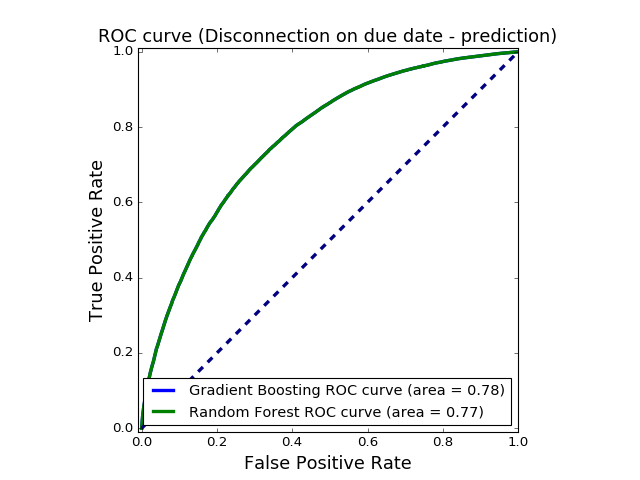

In [169]:
####only to test March

#y_predict_rf = rf.predict_proba(X)[:,1]
#fpr_lr_rf, tpr_lr_rf, _ = roc_curve(y, y_predict_rf)
#roc_auc_lr_rf = auc(fpr_lr_rf, tpr_lr_rf)
#plt.figure()
#plt.xlim([-0.01, 1.00])
#plt.ylim([-0.01, 1.01])
#plt.plot(fpr_lr_rf, tpr_lr_rf, lw=3, label='Random Forest ROC curve (area = {:0.2f})'.format(roc_auc_lr_rf))
#plt.plot(fpr_lr_rf, tpr_lr_rf, lw=3, label='Random Forest ROC curve (area = {:0.2f})'.format(roc_auc_lr_rf))
#plt.xlabel('False Positive Rate', fontsize=16)
#plt.ylabel('True Positive Rate', fontsize=16)
#plt.title('ROC curve (Disconnection on due date - prediction)', fontsize=16)
#plt.legend(loc='lower right', fontsize=13)
#plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
#plt.axes().set_aspect('equal')
#plt.show()


#######################
y_predict_rf = rf.predict_proba(X_test)[:,1]
fpr_lr_rf, tpr_lr_rf, _ = roc_curve(y_test, y_predict_rf)
roc_auc_lr_rf = auc(fpr_lr_rf, tpr_lr_rf)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr_rf, tpr_lr_rf, lw=3, label='Gradient Boosting ROC curve (area = {:0.2f})'.format(roc_auc_lr_clf))
plt.plot(fpr_lr_rf, tpr_lr_rf, lw=3, label='Random Forest ROC curve (area = {:0.2f})'.format(roc_auc_lr_rf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Disconnection on due date - prediction)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

        n         p  y
453960  1  0.977763  1
485646  1  0.972148  1
95555   1  0.971995  1
350431  1  0.970802  1
317280  1  0.970802  1


<IPython.core.display.Javascript object>


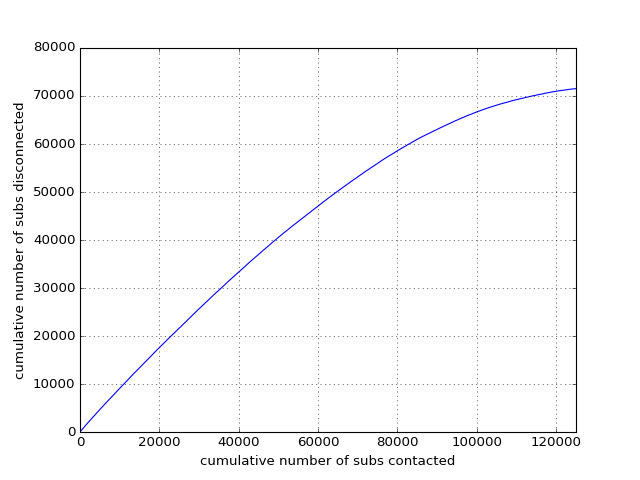

In [179]:
x = pd.DataFrame({'y': y_test, 'p': y_predict_clf, 'n': 1})
x = x.sort_values('p', ascending=False)
print(x.head())
x.cumsum().plot('n', 'y', grid=True, legend = False)
plt.xlabel('cumulative number of subs contacted')
plt.ylabel('cumulative number of subs disconnected')